In [12]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import face_recognition
import keras
from keras.models import load_model
import cv2
from pathlib import Path
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


In [25]:
pth = "../imgs_demo/im_10.jpg"
pth2 = "../imgs_demo/im_20.jpg"

In [29]:
dir_imgs_demo = Path.cwd().parent/'imgs_demo'
dir_faces = Path.cwd().parent/'imgs_faces'
dir_inp1 = Path.home()

In [30]:
dir_imgs

PosixPath('/Users/cris/Iron/ReadingyourAudience/imgs_demo')

In [38]:
def openImageAndDetectFaces3(paaath):
    
    for file in sorted(paaath.iterdir()):
        
        if file.suffix == '.jpg':
            
            image = face_recognition.load_image_file(file)
            face_locations = face_recognition.face_locations(image)
            count = 0
            
            try:
                print(f"I found {len(face_locations)} face(s) in photograph {file.name}.")
                plt.subplot(121)
                plt.imshow(image)
                
                for feis in face_locations:
                    count+=1
                    top, right, bottom, left = feis
                    face_image = image[top:bottom, left:right]
                    face_image = cv2.cvtColor(face_image, cv2.COLOR_RGB2GRAY)
                    pil_image = Image.fromarray(face_image)
                    reshaped_image = modify_size(pil_image)

                    file_face = file.name.replace(".",f"_face{count}.")
                    file_pil = file.name.replace(".",f"_pil{count}.")
                    file_reshaped = file.name.replace(".",f"_reshaped{count}.")
                    cv2.imwrite(str(paaath/file_face), face_image)
                    
                    fig, axarr = plt.subplots(len(face_locations),1)
                    plt.subplot(121)
                    plt.imshow(modify_size(pil_image))
                    #f.name.replace(".",f"_face{count}.")
                    #cv2.imwrite(str(folder_faces/file_pil), pil_image)
                    #cv2.imwrite(str(folder_faces/file_reshaped), reshaped_image)
                    #cv2.imwrite(str(folder_faces/file.name)+f"_face{count}", face_image)
                    #return new_size(pil_image)
            
            except ValueError as e:
                print(f"No face found")
                
    #return reshaped_image

        
def modify_size(img):
    size=(48,48)
    convert_from = img.resize(size)
    face=np.asarray(convert_from)/255
    return face

I found 4 face(s) in photograph im_10.jpg.
I found 1 face(s) in photograph im_10_face1.jpg.
I found 1 face(s) in photograph im_10_face1_face1.jpg.
I found 1 face(s) in photograph im_10_face2.jpg.
I found 1 face(s) in photograph im_10_face3.jpg.
I found 1 face(s) in photograph im_10_face4.jpg.
I found 2 face(s) in photograph im_20.jpg.
I found 0 face(s) in photograph im_20_face1.jpg.
I found 0 face(s) in photograph im_20_face2.jpg.


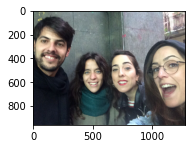

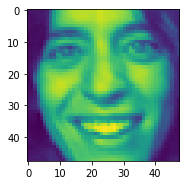

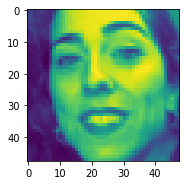

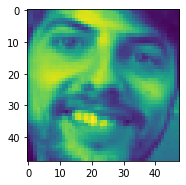

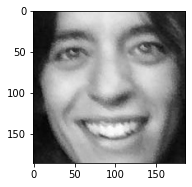

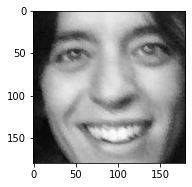

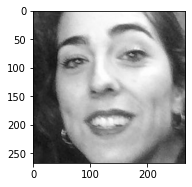

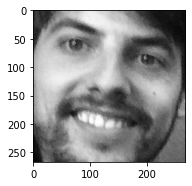

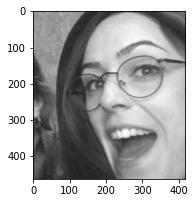

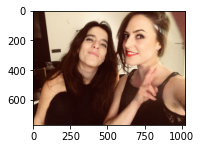

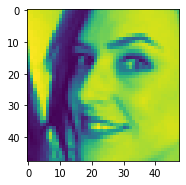

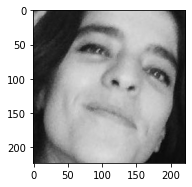

In [39]:
openImageAndDetectFaces3(dir_imgs_demo)

In [40]:
model_pth = Path.cwd().parent/'src'/'model_v6_23.hdf5'

In [41]:
model = load_model(model_pth)